<a href="https://colab.research.google.com/github/asiazo/inzynierkaXD/blob/main/testBinarny.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##import bibliotek

In [1]:

import os
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

##tworzenie folderow

In [2]:
# ścieżka do oryginalnego zbioru
original_dataset_dir = '/content/data'
# katalog, w którym umieścimy nasze dane
base_dir = '/content/data/skin'

if not os.path.exists(base_dir):
    os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')    # katalog zbioru treningowego
valid_dir = os.path.join(base_dir, 'valid')    # katalog zbioru walidacyjnego
test_dir = os.path.join(base_dir, 'test')      # katalog zbioru testowego

for directory in (train_dir, valid_dir, test_dir):
    if not os.path.exists(directory):
        os.mkdir(directory)

train_actinic_dir = os.path.join(train_dir, 'actinic')
train_dermatofibroma_dir = os.path.join(train_dir, 'dermatofibroma')

valid_actinic_dir = os.path.join(valid_dir, 'actinic')
valid_dermatofibroma_dir = os.path.join(valid_dir, 'dermatofibroma')

test_actinic_dir = os.path.join(test_dir, 'actinic')
test_dermatofibroma_dir = os.path.join(test_dir, 'dermatofibroma')

dirs = [train_actinic_dir, train_dermatofibroma_dir, valid_actinic_dir, valid_dermatofibroma_dir, test_actinic_dir, test_dermatofibroma_dir]

for directory in dirs:
    if not os.path.exists(directory):
        os.mkdir(directory)

##rozdział zdjęć

In [9]:

fnames = ['actinic keratosis{}.jpg'.format(i) for i in range(1,51)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_actinic_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['actinic keratosis{}.jpg'.format(i) for i in range(51, 76)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(valid_actinic_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['actinic keratosis{}.jpg'.format(i) for i in range(76, 101)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_actinic_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dermatofibroma{}.jpg'.format(i) for i in range(1,51)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dermatofibroma_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dermatofibroma{}.jpg'.format(i) for i in range(51,76)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(valid_dermatofibroma_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dermatofibroma{}.jpg'.format(i) for i in range(76, 101)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dermatofibroma_dir, fname)
    shutil.copyfile(src, dst)

In [10]:

print('Liczba rogowacenie sloneczne - zbiór treningowy', len(os.listdir(train_actinic_dir)))
print('Liczba rogowacenie sloneczne - zbiór walidacyjny', len(os.listdir(valid_actinic_dir)))
print('Liczba rogowacenie sloneczne - zbiór testowy', len(os.listdir(test_actinic_dir)))

print('Liczba włókniak twardy - zbiór treningowy', len(os.listdir(train_dermatofibroma_dir)))
print('Liczba włókniak twardy - zbiór walidacyjny', len(os.listdir(valid_dermatofibroma_dir)))
print('Liczba włókniak twardy - zbiór testowy', len(os.listdir(test_dermatofibroma_dir)))

Liczba rogowacenie sloneczne - zbiór treningowy 50
Liczba rogowacenie sloneczne - zbiór walidacyjny 25
Liczba rogowacenie sloneczne - zbiór testowy 25
Liczba włókniak twardy - zbiór treningowy 50
Liczba włókniak twardy - zbiór walidacyjny 25
Liczba włókniak twardy - zbiór testowy 25


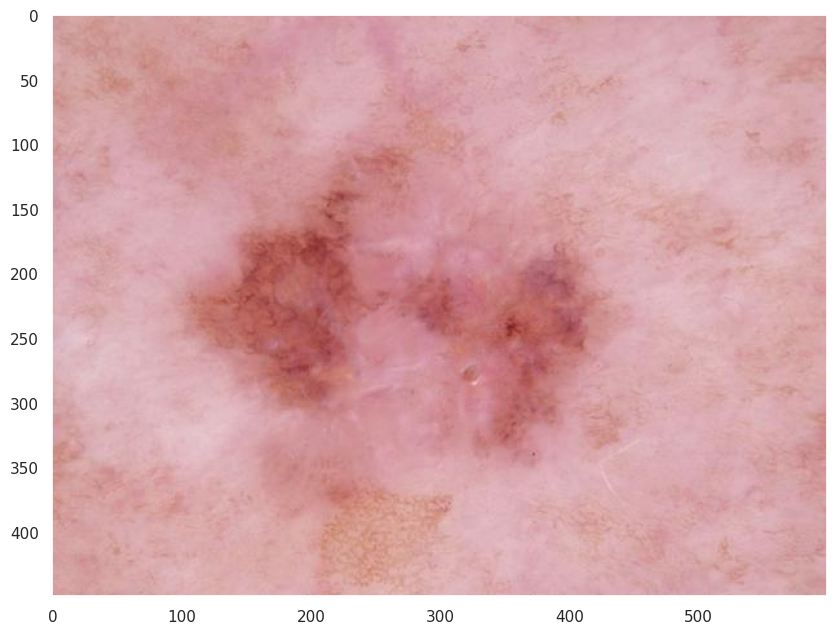

In [19]:
#@title Wybierz indeks przykładowego zdjęcia rogowacenia slonecznego:
from keras.preprocessing import image

index = 19 #@param {type:'slider', min:1, max:50}
img_path = '/content/data/skin/train/actinic/actinic keratosis' + str(index) +'.jpg'

img = image.load_img(img_path)

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.grid(False)

## funkcje do wykresow i agumentacji danych

In [37]:
def make_accuracy_plot(history):
    """
    Funkcja zwraca wykres dokładności (accuracy) modelu na zbiorze treningowym
    i walidacyjnym.
    """
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(10, 8))
    plt.plot(epochs, acc, label='Dokładność trenowania', marker='o')
    plt.plot(epochs, val_acc, label='Dokładność walidacji', marker='o')
    plt.legend()
    plt.title('Dokładność trenowania i walidacji')
    plt.xlabel('Epoki')
    plt.ylabel('Dokładność')
    plt.show()

def make_loss_plot(history):
    """
    Funkcja zwraca wykres straty (loss) modelu na zbiorze treningowym
    i walidacyjnym.
    """
    loss, val_loss = history.history['loss'], history.history['val_loss']
    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(10, 8))
    plt.plot(epochs, loss, label='Strata trenowania', marker='o')
    plt.plot(epochs, val_loss, label='Strata walidacji', marker='o')
    plt.legend()
    plt.title('Strata trenowania i walidacji')
    plt.xlabel('Epoki')
    plt.ylabel('Strata')
    plt.show()

def display_augmented_images(directory, index):
    """
    Funkcja zwraca wykres przykładowych obrazów uzyskanych za pomocą techniki
    augmentacji danych.
    """
    fnames = [os.path.join(directory, fname) for fname in os.listdir(directory)]
    img_path = fnames[index]
    img = image.load_img(img_path, target_size=(150, 150))

    x = image.img_to_array(img)
    x = x.reshape((1, ) + x.shape)

    i = 1
    plt.figure(figsize=(20, 14))
    for batch in datagen.flow(x, batch_size=1):
        plt.subplot(3, 4, i)
        plt.grid(False)
        imgplot = plt.imshow(image.array_to_img(batch[0]))
        i += 1
        if i % 13 == 0:
            break


In [21]:

from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Przeskalowujemy wszystkie obrazy o współczynnik 1/255
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                   target_size=(150, 150),
                                                   batch_size=20,
                                                   class_mode='binary')

valid_generator = valid_datagen.flow_from_directory(directory=valid_dir,
                                                   target_size=(150, 150),
                                                   batch_size=20,
                                                   class_mode='binary')


Found 100 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [43]:
import time
tic = time.time()
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=20,
    validation_data=valid_generator,
    validation_steps=50
)
toc = time.time()
print('Czas przetwarzania: {}'.format(toc - tic))
model.save('skin_1.h5')

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - accuracy: 0.7034 - loss: 0.6034 - val_accuracy: 0.6400 - val_loss: 0.6308
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - accuracy: 0.6672 - loss: 0.5933 - val_accuracy: 0.6000 - val_loss: 0.6334
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - accuracy: 0.7397 - loss: 0.5840 - val_accuracy: 0.5800 - val_loss: 0.6372
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - accuracy: 0.7417 - loss: 0.5595 - val_accuracy: 0.6800 - val_loss: 0.6138
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.7198 - loss: 0.5644 - val_accuracy: 0.7000 - val_loss: 0.6083
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - accuracy: 0.7877 - loss: 0.5428 - val_accuracy: 0.6800 - val_loss: 0.6682
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - accuracy: 0.5868 - loss: 0.6096 - val_accuracy: 0.6000 - val_loss: 0.6306
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.7117 - loss: 0.5619 - val_a

Czas przetwarzania: 169.07715153694153


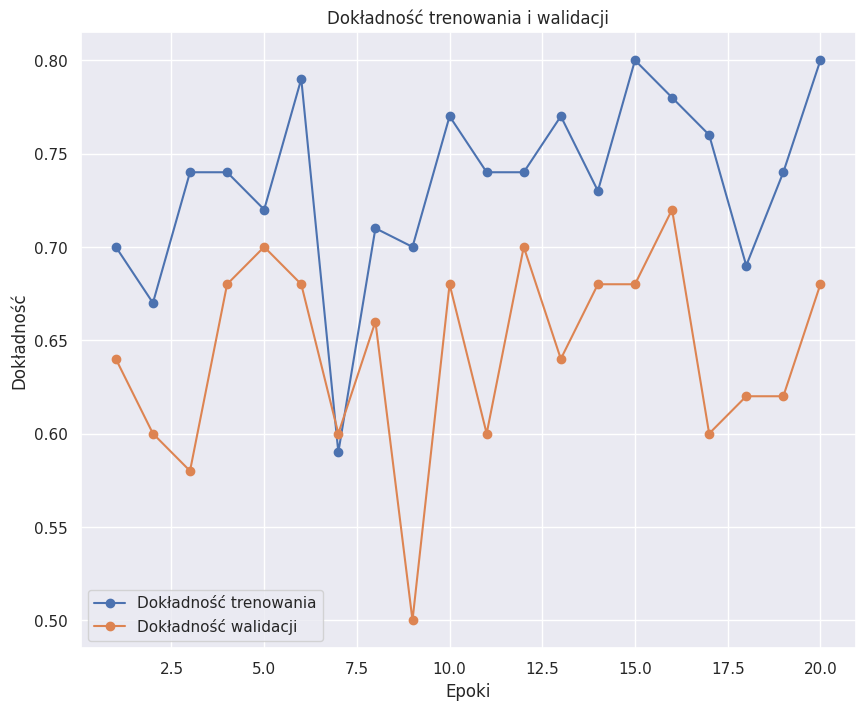

In [44]:
make_accuracy_plot(history)

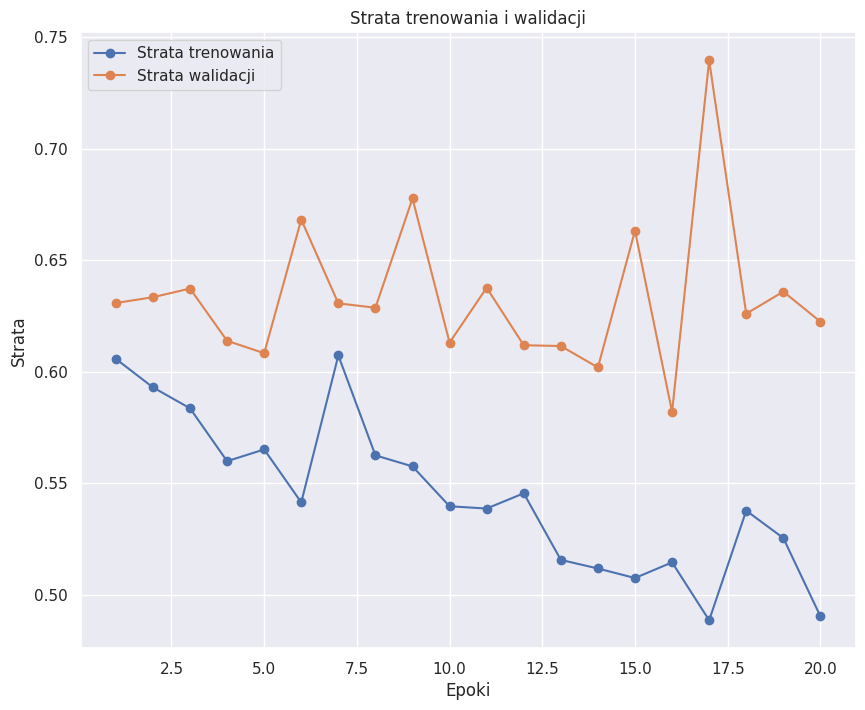

In [45]:
make_loss_plot(history)

In [59]:
datagen = ImageDataGenerator(rotation_range=10,     # zakres kąta o który losowo zostanie wykonany obrót obrazów
                            width_shift_range=0.1,  # pionowe przekształcenia obrazu
                            height_shift_range=0.1, # poziome przekształcenia obrazu
                            shear_range=0.1,        # zares losowego przycianania obrazu
                            zoom_range=0.2,         # zakres losowego przybliżania obrazu
                            horizontal_flip=True,   # losowe odbicie połowy obrazu w płaszczyźnie poziomej
                            fill_mode='nearest')    # strategia wypełniania nowo utworzonych pikseli, któe mogą powstać w wyniku przekształceń


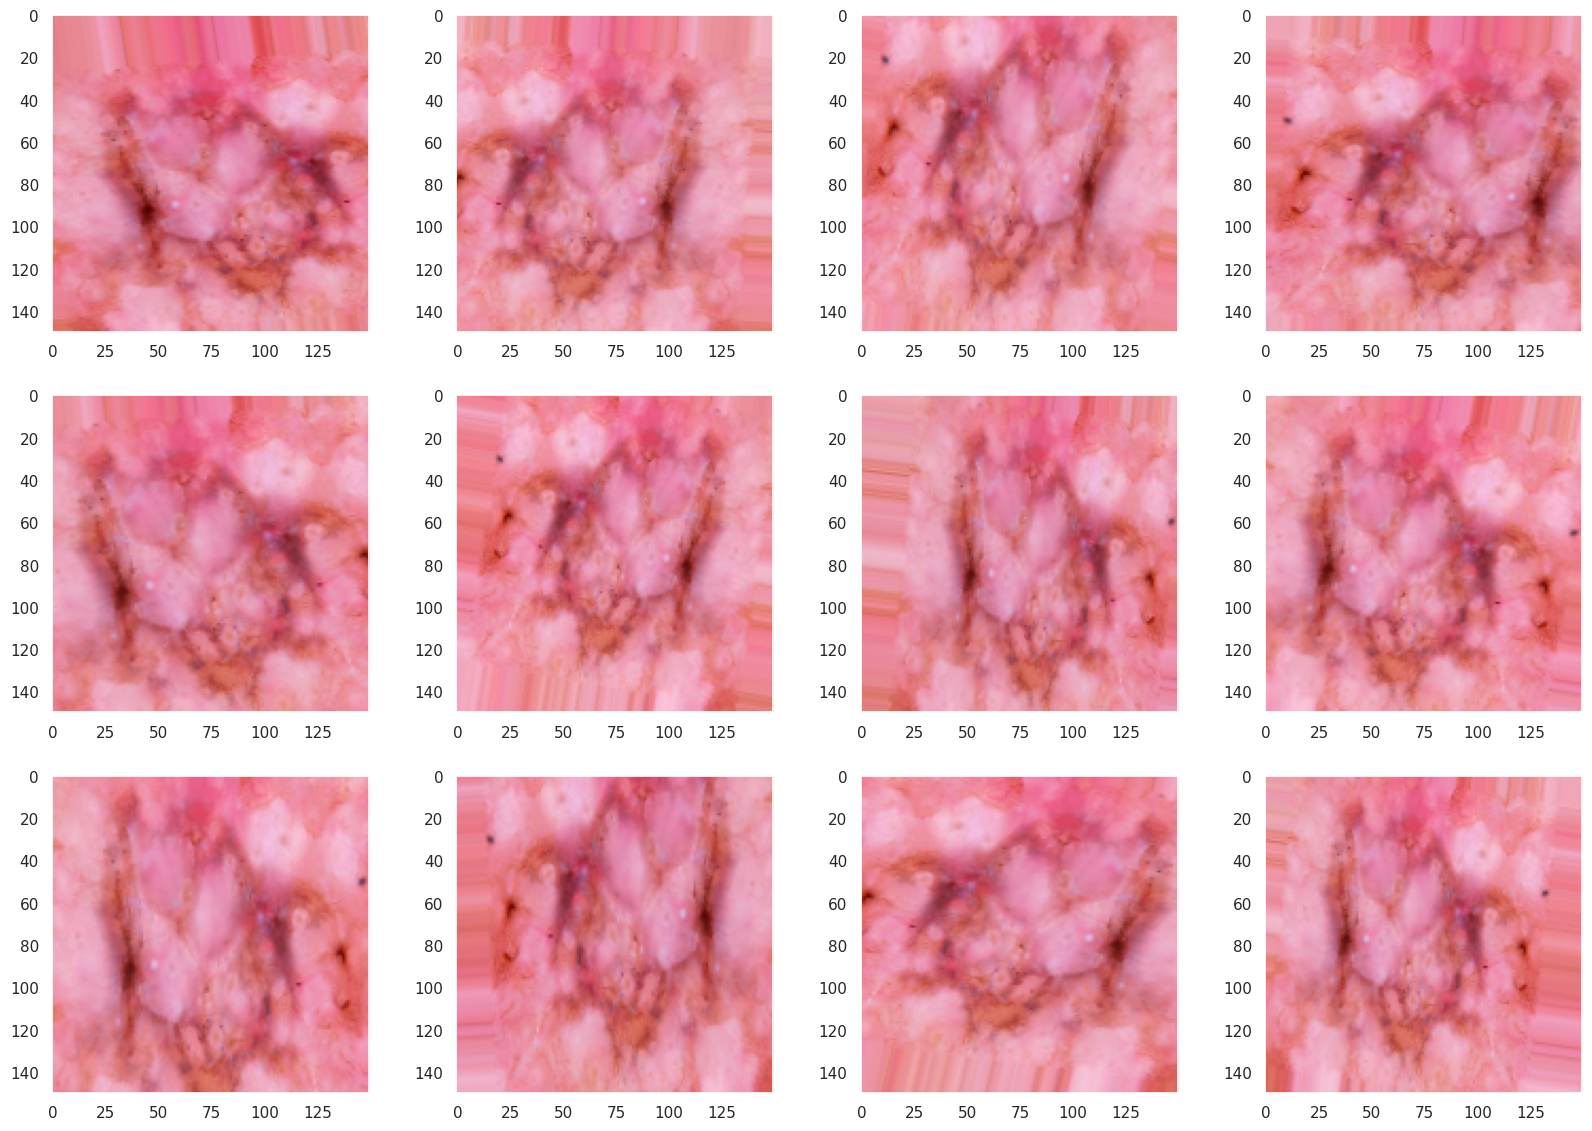

In [60]:
#@title Wybierz index obrazka w celu jego eksploracji
from keras.preprocessing import image

index = 6 #@param {type:'slider', min:1, max:50}
display_augmented_images('/content/data/skin/test/actinic', index)

In [61]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))

model.summary()

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [62]:

train_datagen = ImageDataGenerator(rescale=1./255.,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

# nie modyfikujemy danych walidacyjnych!!!
valid_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                   target_size=(150, 150),
                                                   batch_size=32,
                                                   class_mode='binary')

valid_generator = valid_datagen.flow_from_directory(directory=valid_dir,
                                                   target_size=(150, 150),
                                                   batch_size=32,
                                                   class_mode='binary')

Found 100 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [63]:
history = model.fit(train_generator,
                             steps_per_epoch=100,
                             epochs=20,    # 100
                             validation_data=valid_generator,
                             validation_steps=50)

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 0.4995 - loss: 0.7504 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.5197 - loss: 0.6985 - val_accuracy: 0.5000 - val_loss: 0.6929
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - accuracy: 0.5015 - loss: 0.7157 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.4991 - loss: 0.6946 - val_accuracy: 0.5000 - val_loss: 0.6928
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - accuracy: 0.4513 - loss: 0.6952 - val_accuracy: 0.5000 - val_loss: 0.6929
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - accuracy: 0.4289 - loss: 0.6957 - val_accuracy: 0.5000 - val_loss: 0.6929
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step - accuracy: 0.5028 - loss: 0.6981 - val_accuracy: 0.5000 - val_loss: 0.6928
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - accuracy: 0.4985 - loss: 0.6941 - val_a